### Overview
- Input parameters are the sensors attached to a machine, which are 54 in number. In the dataset, they are named as x0, x1, x2 … x54.
- Since this is a batch manufacturing, a batch is of a certain time period, say t0 is the batch start and t6 is the batch end. Sensor values being recorded at time instance t0, t1, t2 … t6 are labeled as x0_t0, x0_t1, x0_t2 … x0_t6 respectively in the dataset, similarly for the others. All values are numerical (float or binary), there are no string or multiclass type features.
- All the sensors attached to the machine are physically independent although there can be statistical dependency present in their values.
- Then there is output parameter y2 which has to be considered independently. They describe the batch performance.
- Rows in the dataset represent batches. Row numbers are important as they are sorted time-wise. Although batches are considered independent to each other, you may find statistical dependency among them, hence you may convert this problem into a time series multivariate regression problem. It is completely your decision.
- Batch performance is related to the machine’s state which is being captured by those 54 sensors. Hence this problem can be modeled as a multivariate regression problem where you train a model by looking at the machine’s state and compute the batch performance.
### Objective
Achieve the highest possible R2 score for label y2. You can shuffle the data while train-test splitting.

### Settings
Train-test split ratio has been set to 90:10 for final submission. You can choose your values for train-val.

Useful information

1. data on 54 sensors with observations at times t0 to t6.
2. Rows represent batches and are sorted time-wise.
3. It is a multivariate regression Problem.
4. Train data = 794 x 387 , Test data = 89 x 386.
5. There are no missing values.
6. All the coumns are float values except id which is an integer.
7. y2 is our target variable and lie between -2 and 2.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
train_df = pd.read_csv("https://raw.githubusercontent.com/rohitgupta29/Hackathron_1/master/hack_2_batch_manufacturing/datasets/train.csv")

test_df = pd.read_csv("https://raw.githubusercontent.com/rohitgupta29/Hackathron_1/master/hack_2_batch_manufacturing/datasets/test.csv")
print(test_df.shape)
train_df.shape


(89, 386)


(794, 387)

In [51]:
train_df.head()

,Id,x0_t0,x0_t1,x0_t2,x0_t3,x0_t4,x0_t5,x0_t6,x1_t0,x1_t1,...,x53_t5,x53_t6,x54_t0,x54_t1,x54_t2,x54_t3,x54_t4,x54_t5,x54_t6,y2
0,706,762.212216,753.162754,754.610620,762.787135,768.170347,769.815486,750.950000,0.902534,0.873314,...,87.200000,87.2,1.788239,1.883677,1.894829,1.865024,1.755078,2.03000,2.03,0.72
1,239,762.671780,746.631882,745.807832,755.992886,761.814347,766.110745,762.535189,1.366119,1.358298,...,72.613391,87.2,1.920067,1.820872,1.863998,1.827162,1.964556,1.96579,2.03,0.62
2,613,766.867777,756.642963,750.059697,756.377980,760.087594,758.380275,750.950000,0.821431,0.825063,...,87.200000,87.2,2.084817,2.019537,2.197232,2.032493,1.976534,2.03000,2.03,0.57
3,588,751.077287,758.230866,761.391167,763.190054,768.715192,770.447814,750.950000,0.712874,0.744777,...,87.200000,87.2,1.853655,1.848088,1.880007,2.068814,1.871028,2.03000,2.03,1.01
4,780,772.430815,772.254344,772.322597,771.926261,768.820073,772.908223,750.950000,0.742664,0.676266,...,87.200000,87.2,2.211915,2.387687,2.368041,2.360032,2.352961,2.03000,2.03,-0.42


In [52]:
test_df.head()

,Id,x0_t0,x0_t1,x0_t2,x0_t3,x0_t4,x0_t5,x0_t6,x1_t0,x1_t1,...,x53_t4,x53_t5,x53_t6,x54_t0,x54_t1,x54_t2,x54_t3,x54_t4,x54_t5,x54_t6
0,584,738.152456,747.990517,754.681726,750.607263,754.378901,746.444051,750.95,0.740932,0.706801,...,90.828849,87.2,87.2,1.964234,1.913202,1.599676,1.596884,1.480912,2.03,2.03
1,678,750.304526,751.440356,751.625640,751.040838,749.642800,751.071232,750.95,0.714269,0.707234,...,90.498723,87.2,87.2,1.631347,1.660712,1.874003,1.939651,2.044686,2.03,2.03
2,728,778.247612,766.210592,773.076177,775.301112,776.258670,766.606237,750.95,0.943009,0.857520,...,87.886603,87.2,87.2,1.865880,1.778088,2.307626,2.472161,2.193177,2.03,2.03
3,338,759.227472,758.535754,762.247934,774.868563,754.005989,757.404229,750.95,1.035127,1.049087,...,84.867806,87.2,87.2,1.876135,2.091196,1.835713,1.870825,1.741741,2.03,2.03
4,570,770.473802,768.971055,770.843730,771.960856,768.813193,760.116829,750.95,1.299968,1.374928,...,88.013675,87.2,87.2,1.893169,2.407545,2.322047,2.082357,2.099017,2.03,2.03


In [24]:
train_df["Id"].nunique() # all values have unique Id

794

Id        0
x0_t0     0
x0_t1     0
x0_t2     0
x0_t3     0
         ..
x54_t2    0
x54_t3    0
x54_t4    0
x54_t5    0
x54_t6    0
Length: 386, dtype: int64

In [53]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 794 entries, 0 to 793
Columns: 387 entries, Id to y2
dtypes: float64(386), int64(1)
memory usage: 2.3 MB


Its good to see that there are no missing values in the dataset

In [26]:
train_df.describe()

,Id,x0_t0,x0_t1,x0_t2,x0_t3,x0_t4,x0_t5,x0_t6,x1_t0,x1_t1,...,x53_t5,x53_t6,x54_t0,x54_t1,x54_t2,x54_t3,x54_t4,x54_t5,x54_t6,y2
count,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,7.940000e+02,7.940000e+02,...,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000
mean,438.658690,754.919194,754.729879,754.646425,754.540917,754.424182,754.535914,752.154530,8.751822e-01,8.713170e-01,...,86.782481,87.233572,1.931834,1.929294,1.929327,1.930606,1.918361,2.004459,2.028760,0.528841
std,254.610219,13.126818,17.596497,13.928037,13.114229,13.238951,13.424742,7.333076,3.501364e-01,3.526789e-01,...,8.688329,1.375731,0.370322,0.416583,0.375554,0.364132,0.373211,0.184948,0.029712,0.184369
min,0.000000,694.863409,436.366425,648.518443,689.144977,682.132476,680.739213,704.677729,-1.164153e-11,-1.164153e-11,...,25.000000,75.965148,0.135551,0.141006,0.123514,0.086733,0.032860,0.079038,1.273031,-1.660000
25%,217.250000,746.507394,746.225540,746.135900,746.381193,746.140993,746.019990,750.950000,6.932981e-01,6.882317e-01,...,87.200000,87.200000,1.804678,1.780031,1.783420,1.802233,1.779655,2.030000,2.030000,0.450000
50%,438.500000,756.095127,756.750034,755.696801,755.539600,756.077535,755.891258,750.950000,7.969188e-01,7.985343e-01,...,87.200000,87.200000,1.964852,1.951801,1.977931,1.974037,1.944210,2.030000,2.030000,0.580000
75%,658.750000,764.434651,764.838969,764.572070,764.113391,764.013162,764.111608,750.950000,1.228083e+00,1.230598e+00,...,87.200000,87.200000,2.136718,2.145547,2.136183,2.135681,2.121476,2.030000,2.030000,0.600000
max,881.000000,790.272046,791.044214,790.588038,789.457827,786.099166,788.762156,785.730598,1.568039e+00,1.596464e+00,...,125.000000,123.653108,3.026312,6.884922,2.994906,2.932883,2.807641,2.729407,2.083415,1.600000


In [56]:
test_df.describe()

,Id,x0_t0,x0_t1,x0_t2,x0_t3,x0_t4,x0_t5,x0_t6,x1_t0,x1_t1,...,x53_t4,x53_t5,x53_t6,x54_t0,x54_t1,x54_t2,x54_t3,x54_t4,x54_t5,x54_t6
count,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,8.900000e+01,8.900000e+01,...,89.000000,89.000000,8.900000e+01,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,8.900000e+01
mean,461.887640,752.503972,751.217533,752.766903,752.373684,754.152886,753.375496,751.799488,8.318631e-01,8.435736e-01,...,83.345730,85.756633,8.720000e+01,1.931753,1.923782,1.939630,1.897736,1.883710,1.989814,2.030000e+00
std,259.403881,23.161653,20.796773,12.251820,11.967530,11.776136,12.095238,6.118249,3.524507e-01,3.718631e-01,...,16.642310,7.200828,1.286223e-13,0.414742,0.418386,0.434764,0.394312,0.437741,0.195374,8.932106e-16
min,8.000000,629.212304,611.995157,720.749088,724.519761,718.062246,715.608200,731.042622,-1.164153e-11,-1.164153e-11,...,25.000000,25.000000,8.720000e+01,0.119943,0.140988,0.137946,0.154212,0.083046,0.599050,2.030000e+00
25%,252.000000,748.124136,746.187088,746.018664,746.151038,747.031621,747.705227,750.950000,6.878176e-01,7.072343e-01,...,77.360561,87.200000,8.720000e+01,1.787589,1.795377,1.798774,1.752737,1.739583,2.030000,2.030000e+00
50%,493.000000,755.060562,753.369875,751.990274,752.062788,754.288647,754.364426,750.950000,7.864595e-01,7.837034e-01,...,86.207907,87.200000,8.720000e+01,1.991964,1.997403,1.968019,1.919322,1.898722,2.030000,2.030000e+00
75%,678.000000,763.936834,763.168119,761.922061,760.687029,761.686310,760.643874,750.950000,1.035127e+00,1.049087e+00,...,89.343672,87.200000,8.720000e+01,2.166515,2.154985,2.172009,2.121617,2.111986,2.030000,2.030000e+00
max,882.000000,780.744432,776.476101,773.331359,778.172709,778.260783,779.212226,778.105879,1.409834e+00,1.623566e+00,...,125.000000,94.008823,8.720000e+01,2.430922,2.598832,2.875715,2.577770,2.634380,2.375215,2.030000e+00


In [57]:
#every x has 6 columns

### Since y2 i.e. Batch Performance  is the target variable. So, lets analyze it first.

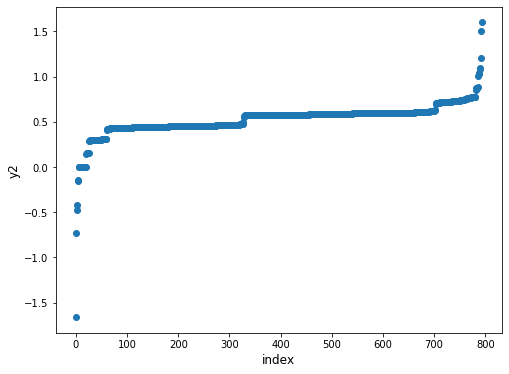

In [58]:
plt.figure(figsize=(8,6))
plt.scatter(range(train_df.shape[0]), np.sort(train_df.y2.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('y2', fontsize=12)
plt.show()

## - Batch Performance seem to be increasing over index, with 0 in the beginning and > 1.5 by the last row.

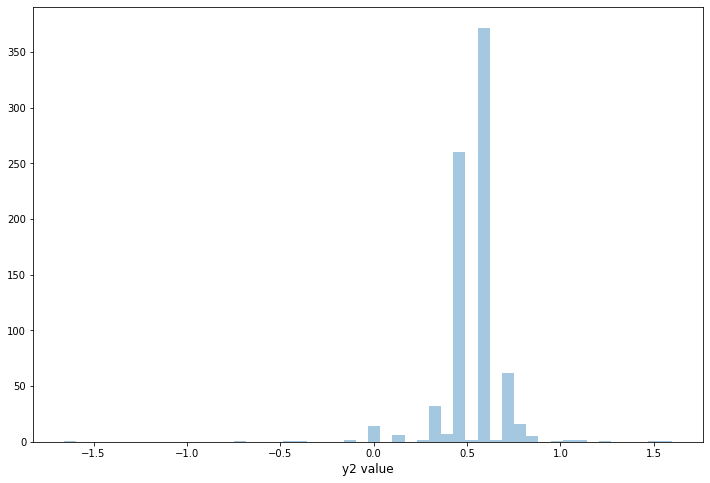

In [59]:
# ulimit = 180
# train_df['y2'].ix[train_df['y2']>ulimit] = ulimit

plt.figure(figsize=(12,8))
sns.distplot(train_df.y2.values, bins=50, kde=False)
plt.xlabel('y2 value', fontsize=12)
plt.show()

- Majority of values are around 0.4 and 0.6

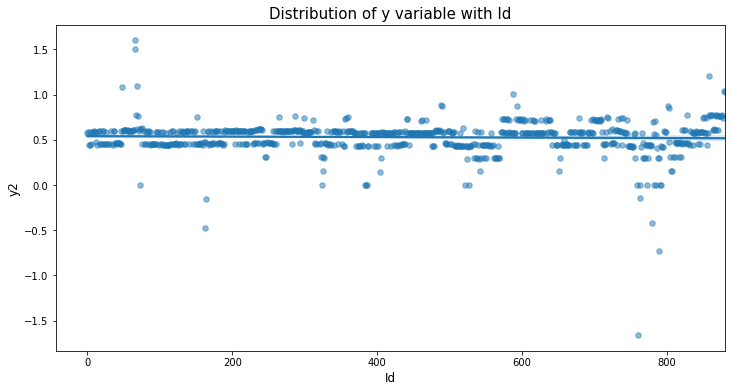

In [60]:
var_name = "Id"
plt.figure(figsize=(12,6))
sns.regplot(x=var_name, y='y2', data=train_df, scatter_kws={'alpha':0.5, 's':30})
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y2', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()


<Figure size 432x720 with 0 Axes>

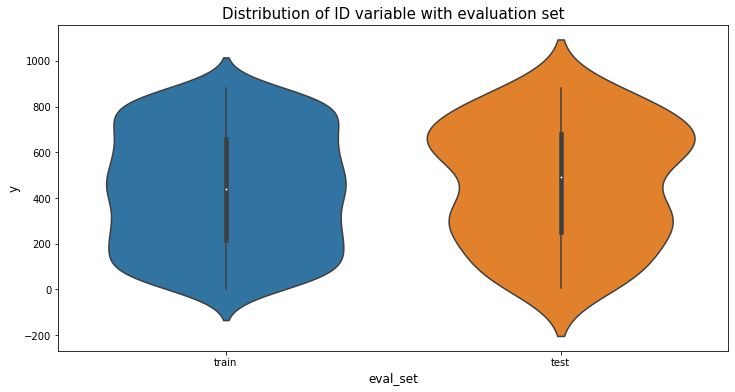

In [61]:
plt.figure(figsize=(6,10))
train_df['eval_set'] = "train"
test_df['eval_set'] = "test"
full_df = pd.concat([train_df[["Id","eval_set"]], test_df[["Id","eval_set"]]], axis=0)

plt.figure(figsize=(12,6))
sns.violinplot(x="eval_set", y='Id', data=full_df)
plt.xlabel("eval_set", fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of ID variable with evaluation set", fontsize=15)
plt.show()

### - Id distribution is varying across train and test data

Data Types present

In [33]:
dtype_df = train_df.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,1
1,float64,386


So majority of the columns are floats with 1 integer column (id)

In [39]:
train_df[["Id","y2"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 794 entries, 0 to 793
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      794 non-null    int64  
 1   y2      794 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 12.5 KB


## We can use var_visual function to visualize data in the given columns.

In [63]:
def var_visual(var_name):
    var_name = var_name
    col_order = np.sort(train_df[var_name].unique()).tolist()
    plt.figure(figsize=(18,6))
    sns.stripplot(x=var_name, y='y2', data=train_df, order=col_order)
    plt.xlabel(var_name, fontsize=12)
    plt.ylabel('y2', fontsize=12)
    plt.title("Distribution of y2 variable with "+var_name, fontsize=15)
    plt.show()

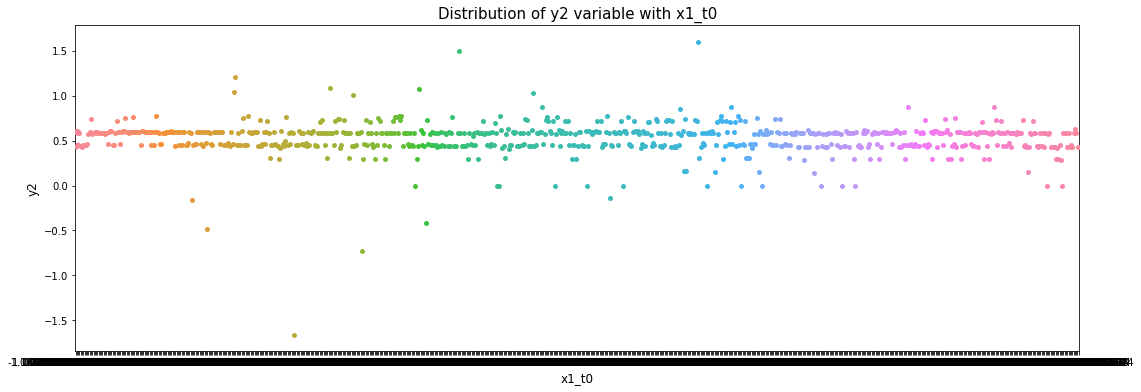

In [64]:
var_visual("x1_t0")

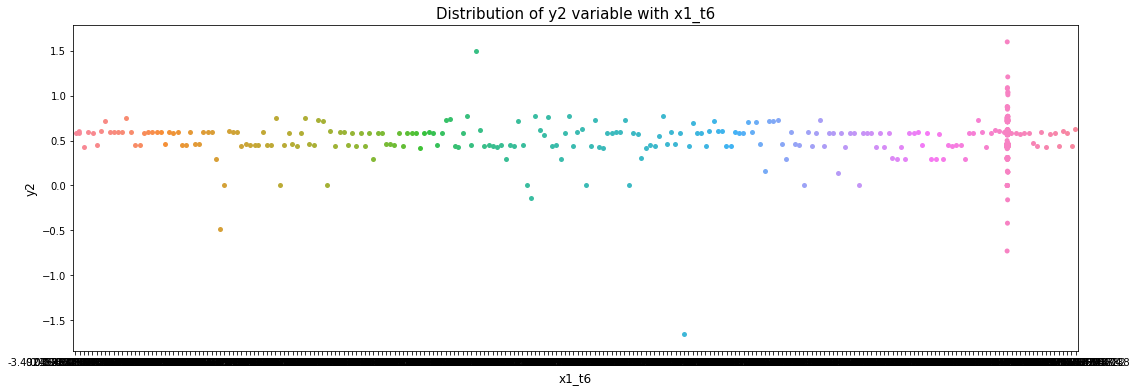

In [65]:
var_visual("x1_t6")

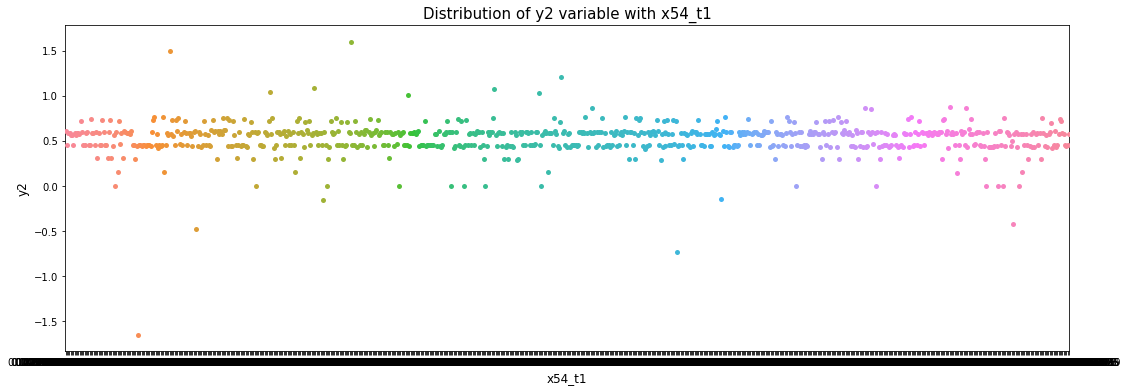

In [68]:
var_visual("x54_t1")

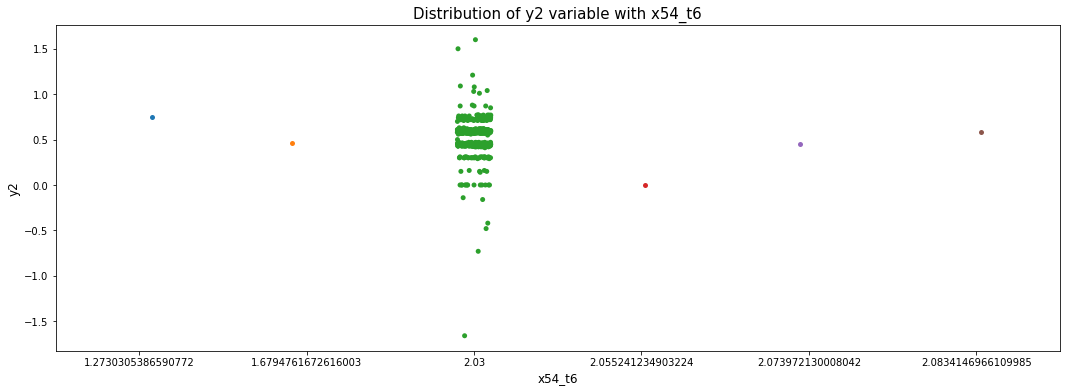

In [66]:
var_visual("x54_t6")